# Decision trees

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

## Classification

In [2]:
# load dataset

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
# select features by importance

sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=10))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=10))

In [4]:
# the selected features
sel_.get_support()

array([ True, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False])

In [5]:
# let's make a list and count the selected features

selected_feat = X_train.columns[(sel_.get_support())]

len(selected_feat)

8

In [6]:
selected_feat

Index(['mean radius', 'mean area', 'mean concavity', 'mean concave points',
       'radius error', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')

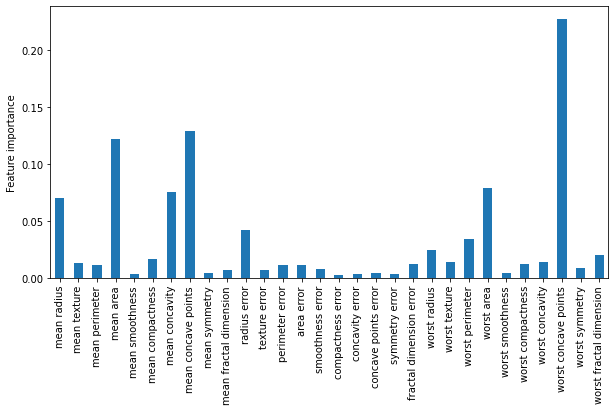

In [7]:
# and now let's plot the feature importance

pd.Series(sel_.estimator_.feature_importances_.ravel(), index=X_train.columns).plot.bar(figsize=(10,5))
plt.ylabel('Feature importance')
plt.show()

In [8]:
# We can then remove the features from the training and testing set
# like this:

X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)

X_train_selected.shape, X_test_selected.shape

((426, 8), (143, 8))

## Regression

In [9]:
# load the California House price data

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Separate data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

### Select Features with tree importance

In [11]:
# select features by importance

sel_ = SelectFromModel(RandomForestRegressor(n_estimators=5, random_state=10))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=5,
                                                random_state=10))

In [12]:
# let's make a list and count the selected features

selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

2

In [13]:
selected_feat

Index(['MedInc', 'AveOccup'], dtype='object')

In [14]:
# we can then remove the features from the training and testing set
# like this:

X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)

X_train_selected.shape, X_test_selected.shape

((15480, 2), (5160, 2))